In [1]:
import torch
from PIL import Image
from model.classifier import VGG16

model = VGG16(10)
path_T = "../training/data/model_data/VGG16/VGG16MNIST.tar"
# path_T = "../training/data/model_data/VGG16/dp_VGG16MNIST.tar"
model = torch.nn.DataParallel(model).cuda()
model.load_state_dict(torch.load(path_T)['state_dict'], strict=False)
model.eval()

/home/bot/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/bot/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


DataParallel(
  (module): VGG16(
    (feature): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=

#### load image

In [2]:
image_path = r"/home/bot/coding/bachelorarbeit/ba_code/reinforcment_based/result/images/VGG16/9.png"
image = Image.open(image_path).convert("RGB")

from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
])

image_data = transform(image).unsqueeze(0)
print(image_data.shape)

import numpy as np

image_show = image_data.numpy()
image_show = np.transpose(image_show, (0,2,3,1)).squeeze()
print(image_show.shape)

torch.Size([1, 3, 64, 64])
(64, 64, 3)


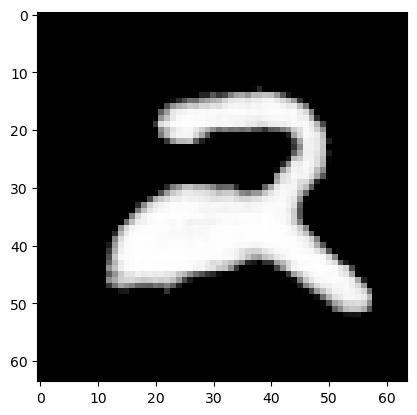

In [3]:
import matplotlib.pyplot as plt

plt.imshow(image_show)

In [4]:
with torch.no_grad():
    _, output = model(image_data)

print(output)

tensor([[-0.0142, -0.0395,  0.2045, -0.0141, -0.0374, -0.0497, -0.0392,  0.0164,
         -0.0153, -0.0391]], device='cuda:0')


In [5]:
import torch.nn.functional as F

conf_score = F.softmax(output)
print(conf_score)

tensor([[0.0986, 0.0961, 0.1227, 0.0986, 0.0963, 0.0952, 0.0962, 0.1017, 0.0985,
         0.0962]], device='cuda:0')


/tmp/ipykernel_13471/2916250912.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  conf_score = F.softmax(output)


In [6]:
predicted_class = torch.argmax(conf_score).item()
print(predicted_class)

2


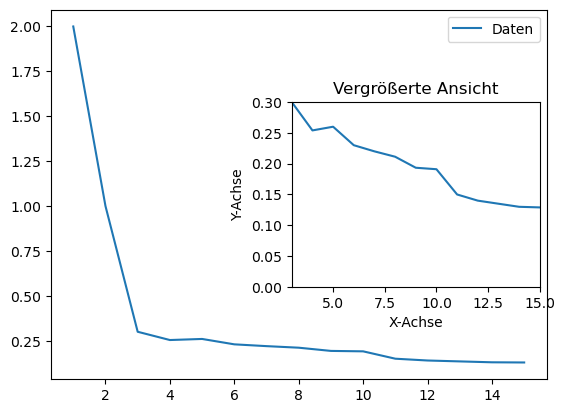

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Beispiel-Daten
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
y = [2, 1, 0.3, 0.254, 0.26, 0.23, 0.22, 0.2113, 0.1934, 0.191, 0.15, 0.14, 0.135, 0.13, 0.129]

# Hauptgrafik erstellen
fig, ax = plt.subplots()

# Hauptgrafik zeichnen
ax.plot(x, y, label='Daten')

# Bereich für die vergrößerte Ansicht festlegen
left, bottom, width, height = [0.6, 0.6, 0.25, 0.25]
axins = inset_axes(ax, width='50%', height='50%', loc='right')

# Vergrößerten Bereich zeichnen
axins.set_xlim(3, x[-1])
axins.set_ylim(0, 0.3)
axins.plot(x, y)

# Achsenbeschriftungen und Titel für die vergrößerte Ansicht
axins.set_xlabel('X-Achse')
axins.set_ylabel('Y-Achse')
axins.set_title('Vergrößerte Ansicht')

# Legende für die Hauptgrafik
ax.legend()

plt.show()
